In [1]:
import sys
import os
import numpy
import dadi
from dadi import Numerics, PhiManip, Integration, Misc
from dadi.Spectrum_mod import Spectrum
import pylab
import matplotlib.pyplot as plt
import my_models
import argparse
import pandas

The only part you need to change

In [35]:
chosen_model = "model_1_b"
pops = "sm_ki"

load data into a dadi FS

In [2]:
datafile = 'data/dummy_dani_variants.vcf.gz'

In [3]:
popfile = 'data/dummy_popfile.txt'

In [4]:
dd = dadi.Misc.make_data_dict_vcf(datafile, popfile)

In [23]:
pop_ids = pops.split("_")
proj = [38,26]
fs = dadi.Spectrum.from_data_dict(dd, pop_ids=pop_ids, projections = proj, polarized = False)

choose best parameters from the 20 repetitions

In [41]:
all_best_lls = []

for i in range(1, 21):
    
    model_file_name = ["tables/", pops, ".", chosen_model, ".optimized.r_", str(i), ".txt"]
    model_file_name = ''.join(model_file_name)
    if os.path.exists(model_file_name):
        model_optimized_allrounds = pandas.read_csv(model_file_name, sep='\t')
        ll_col = model_optimized_allrounds.loc[:,"log-likelihood"]
        best_ll = model_optimized_allrounds.iloc[ll_col.idxmax(),]
        all_best_lls.append(best_ll)

all_best_lls_df = pandas.concat(all_best_lls, axis=1).T
best_ll = all_best_lls_df.sort_values('log-likelihood', ascending=False)[:1]
param_string = best_ll.iloc[0,6].split(",")
params = [float(l) for l in param_string]

In [44]:
print("for", chosen_model, "best repetition was", best_ll.iloc[0,1])
print("with a log-likelihood of", best_ll.iloc[0,2], "and the following parameters:")
if len(params) == 9:
    param_def = ["Tsplit", "Tbot", "iber_a", "iber_pr", "eura_a", "eura_pr", "m", "m_12", "m_21"]
if len(params) == 13:
    param_def = ["Tsplit", "Tbot", "Tbot_a", "iber_a", "iber_pr_a", "iber_pr", "eura_a", "eura_pr", "m", "ma_12", "ma_21", "m_12", "m_21"]
for i in range(0, len(params)):
        print(param_def[i], ":", params[i])

for model_1_b best repetition was Round_4_Replicate_29 with a log-likelihood of -18725.35 and the following parameters:
Tsplit : 0.3211
Tbot : 0.7063
iber_a : 0.2344
iber_pr : 0.1665
eura_a : 0.2236
eura_pr : 0.3097
m : 6.9633
m_12 : 0.2882
m_21 : 0.2094


In [48]:
ns = proj
pts = 60

In [49]:
if chosen_model == "model_1_a":
	model = my_models.model_1_a(params=params, ns=ns, pts=pts)

elif chosen_model == "model_1_b":
	model = my_models.model_1_b(params=params, ns=ns, pts=pts)

elif chosen_model == "model_2_a":
	model = my_models.model_2_a(params=params, ns=ns, pts=pts)

elif chosen_model == "model_2_b":
	model = my_models.model_2_b(params=params, ns=ns, pts=pts)

elif chosen_model == "model_2_c":
	model = my_models.model_2_c(params=params, ns=ns, pts=pts)

elif chosen_model == "model_2_d":
	model = my_models.model_2_d(params=params, ns=ns, pts=pts)

model_folded = model.fold()

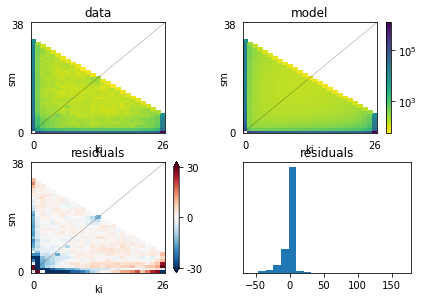

In [50]:
plot_file_name = ["plots/", chosen_model, ".2D_comp_multinom.pdf"]
plot_file_name = ''.join(plot_file_name)

fig = pylab.figure(1)
fig.clear()
dadi.Plotting.plot_2d_comp_multinom(model, fs, pop_ids=pop_ids, resid_range=30, residual='Anscombe')
fig.savefig(plot_file_name)